<a href="https://colab.research.google.com/github/Tsyhankova/goit_python/blob/main/HW_11_tensorflow_fashion_mnist_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install keras

In [ ]:
#pip install tensorflow

In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras import Model, layers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import  metrics


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# Загружаем датасет
(X_train, Y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Задаем рабочую папку, где уже находятся скачанные данные с https://www.kaggle.com/zalando-research/fashionmnist 
# для того, чтобы поделить train data на валидационные и тренировочные

import os
os.chdir("C:/Users/Me/anaconda3/MNIST_FASHION")

In [ ]:
# Читаем данные

train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")
test.shape

(10000, 785)

In [ ]:
train.shape

(60000, 785)

In [ ]:
# Разделяем предикторы и отклик
Y = train['label'] #labels от 0 до 9 
X = train.drop(['label'], axis=1) #пиксели

Y 

0        2
1        9
2        6
3        0
4        3
        ..
59995    9
59996    1
59997    8
59998    8
59999    7
Name: label, Length: 60000, dtype: int64

In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Разделяем train на обучающую выборку и выборку валидации
x_train, x_val, y_train, y_val = train_test_split(X.values, Y.values, test_size=0.10, random_state=42)


In [ ]:
x_train.shape, x_val.shape, x_test.shape

((54000, 784), (6000, 784), (10000, 28, 28))

In [ ]:
num_features = 784

# параметры сети, чтобы их было удобно менять
batch_size = 32
num_classes = 10
epochs = 5 

# размерность картинки
img_rows, img_cols = 28, 28


In [ ]:
# преобразование обучающей выборки
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train /= 255

# преобразование выборки валидации
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_val = x_val.astype('float32')
x_val /= 255

#  преобразование тестовой выборки
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test = x_test / 255
x_test.shape

(10000, 28, 28, 1)

In [ ]:
from keras.utils import np_utils

In [ ]:

input_shape = (img_rows, img_cols, 1)

# преобразование отклика в 10 бинарных перменных 
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_val = keras.utils.np_utils.to_categorical(y_val, num_classes)

y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [ ]:
def cnn(input_shape=input_shape):   
    # описание сети
    model = Sequential()

    # первый сверточный слой
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

    # второй сверточный слой
    model.add(Conv2D(64, (3, 3), activation='relu'))

    # слой Pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # слой dropout
    model.add(Dropout(0.25))

    # растягиваем в вектор
    model.add(Flatten())

    # первый слой анализа 
    model.add(Dense(128, activation='relu'))

    # слой dropout
    model.add(Dropout(0.5))

    # второй слой анализа 
    model.add(Dense(num_classes, activation='softmax'))
    return model

model = cnn()

# определяемся с обучением
model.compile(loss=keras.losses.categorical_crossentropy,  optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_val, y_val))
accuracy = model.evaluate(x_val, y_val, verbose=0)
print('Test accuracy:', accuracy[1])


Epoch 1/5
1688/1688 [==============================] - 185s 109ms/step - loss: 0.5036 - accuracy: 0.8204 - val_loss: 0.2827 - val_accuracy: 0.8933
Epoch 2/5
1688/1688 [==============================] - 197s 117ms/step - loss: 0.3349 - accuracy: 0.8821 - val_loss: 0.2547 - val_accuracy: 0.9038
Epoch 3/5
1688/1688 [==============================] - 188s 112ms/step - loss: 0.2857 - accuracy: 0.8957 - val_loss: 0.2268 - val_accuracy: 0.9152
Epoch 4/5
1688/1688 [==============================] - 196s 116ms/step - loss: 0.2537 - accuracy: 0.9072 - val_loss: 0.2221 - val_accuracy: 0.9218
Epoch 5/5
1688/1688 [==============================] - 209s 124ms/step - loss: 0.2303 - accuracy: 0.9162 - val_loss: 0.2188 - val_accuracy: 0.9220
Test accuracy: 0.921999990940094


In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=3, verbose=1, validation_data=(x_test, y_test))
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', accuracy[1])

Epoch 1/3
1688/1688 [==============================] - 199s 118ms/step - loss: 0.2092 - accuracy: 0.9220 - val_loss: 0.1601 - val_accuracy: 0.9380
Epoch 2/3
1688/1688 [==============================] - 205s 121ms/step - loss: 0.1958 - accuracy: 0.9273 - val_loss: 0.1477 - val_accuracy: 0.9468
Epoch 3/3
1688/1688 [==============================] - 199s 118ms/step - loss: 0.1820 - accuracy: 0.9318 - val_loss: 0.1517 - val_accuracy: 0.9464
Test accuracy: 0.946399986743927


In [ ]:
predictions = model(x_test)

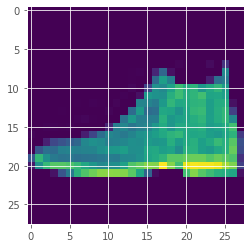

Ответ нейросети:  Ankle boot


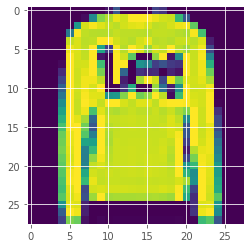

Ответ нейросети:  Pullover


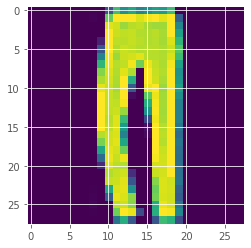

Ответ нейросети:  Trouser


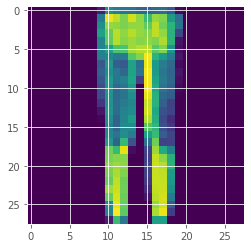

Ответ нейросети:  Trouser


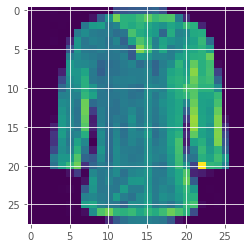

Ответ нейросети:  Shirt


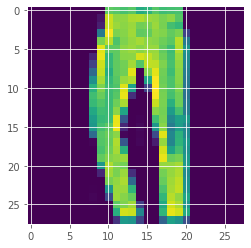

Ответ нейросети:  Trouser


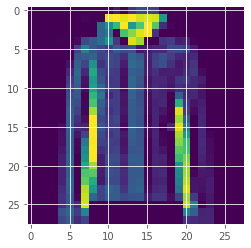

Ответ нейросети:  Coat


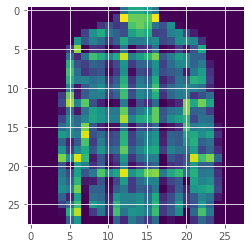

Ответ нейросети:  Shirt


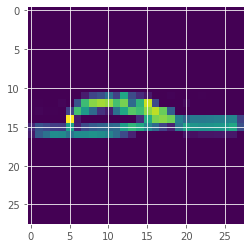

Ответ нейросети:  Sandal


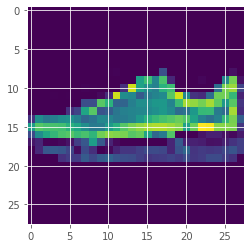

Ответ нейросети:  Sneaker


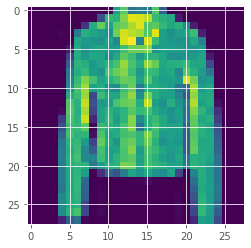

Ответ нейросети:  Coat


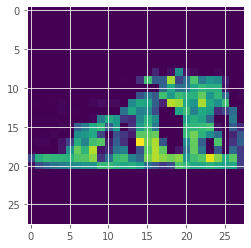

Ответ нейросети:  Sandal


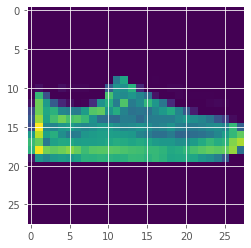

Ответ нейросети:  Sneaker


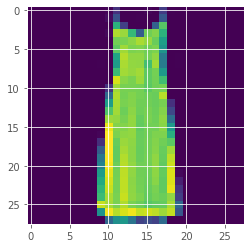

Ответ нейросети:  Dress


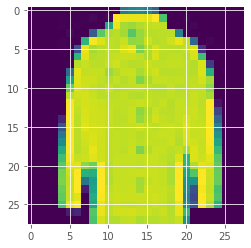

Ответ нейросети:  Coat


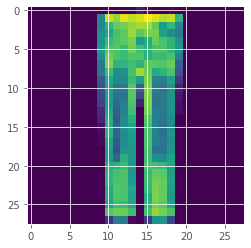

Ответ нейросети:  Trouser


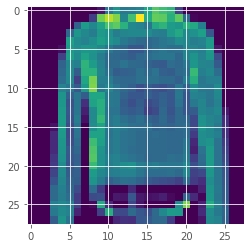

Ответ нейросети:  Pullover


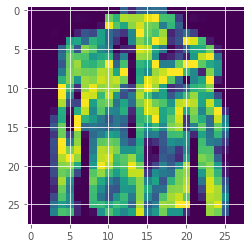

Ответ нейросети:  Coat


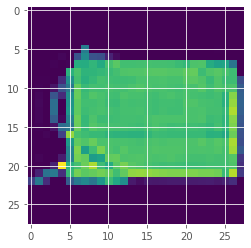

Ответ нейросети:  Bag


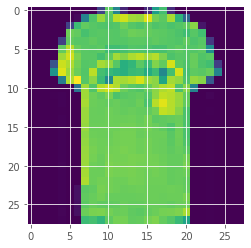

Ответ нейросети:  T-shirt/top


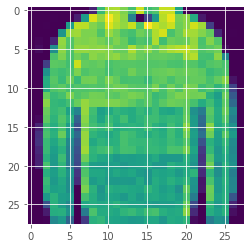

Ответ нейросети:  Pullover


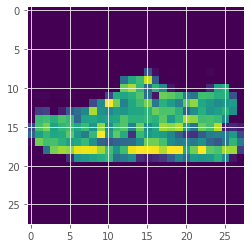

Ответ нейросети:  Sandal


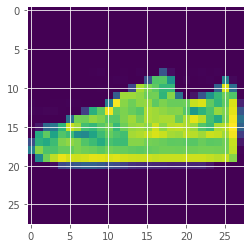

Ответ нейросети:  Sneaker


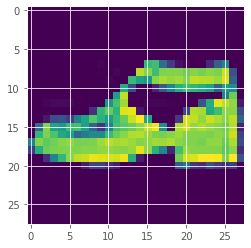

Ответ нейросети:  Ankle boot


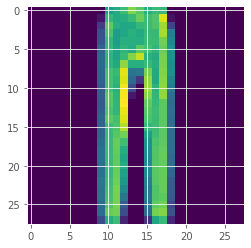

Ответ нейросети:  Trouser


In [ ]:
label_dictionary = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 
                     3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 
                     7:'Sneaker', 8:'Bag', 9:'Ankle boot' }

for i in range(25):
    plt.imshow(np.reshape(x_test[i], [28, 28]))
    plt.show()
    print("Ответ нейросети: ", label_dictionary[np.argmax(predictions.numpy()[i])])

После обучения и тестирования на валидационных данных, результат был более 90 процентов в данной архитектуре CNN. Тестирование на тестовых данных показывает еще выше результат Test accuracy: 0.946399986743927, при низком loss.
И MLP, и CNN могут использоваться для классификации изображений, MLP принимает вектор в качестве входных данных, а CNN принимает тензор в качестве входных данных, поэтому CNN может лучше понимать пространственные отношения между пикселями изображений, для сложных изображений CNN будет работать лучше, чем MLP. 
В моем случае CNN также сработал лучше, чем MLP в предыдущем задании https://github.com/Tsyhankova/goit_python/blob/main/HW_10_tensorflow_fashion_mnist_MLP.ipynb